In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ
using EllipsisNotation

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


In [2]:
runID = "13"


ϵs = npzread("../data/run_$runID/Epsilons.npy")
rsource = 10.0
θsource = 0.5π
ϕsource = 0.0

robs = 100.0
θobs = 0.4π
ϕobs = π


as = 0.99

postproc_options = GSHEIntegrator.PostprocOptions(check_sols=true)
ode_options = GSHEIntegrator.ODESolverOptions(Δθ=0.00001, horizon_tol=1.0001, no_loops=false, maxiters=10000)
opt_options = GSHEIntegrator.OptimiserOptions(Nconsec=20)


geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=rsource, θsource=θsource, ϕsource=ϕsource,
   robs=robs, θobs=θobs, ϕobs=ϕobs, a=as, s=2, postproc_options=postproc_options, ode_options=ode_options);

In [3]:
Xgeos = npzread("../data/run_$runID/Xgeos.npy")
Xgshes = npzread("../data/run_$runID/Xgshes.npy")
αs = npzread("../data/run_$runID/alphas.npy")
βs = npzread("../data/run_$runID/betas.npy");
kx = npzread("../data/run_$runID/dir1.npy");
ky = npzread("../data/run_$runID/dir2.npy");

N = size(αs, 1)


# ϵs = (10).^(LinRange(-2, -1, 300))

250000

3774


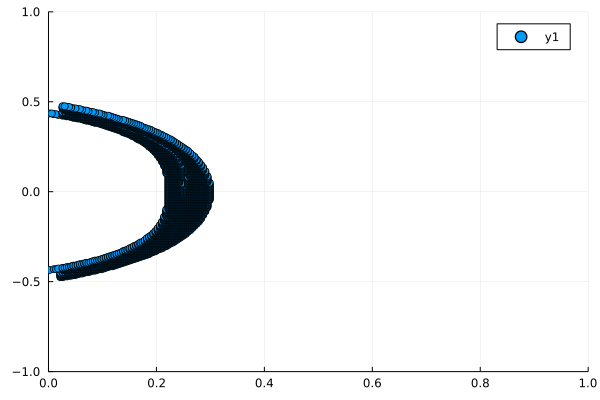

In [32]:
dirs = GSHEIntegrator.make_2dmesh(kx, ky)


m1 = sqrt.(reshape(mapslices(sum, dirs.^2, dims=2), N)) .< 1
m2 = (dirs[:, 2] .> 0.0) .&& (dirs[:, 2] .< 0.8)
m3 = .~isnan.(βs[:, 1])
# m4 = (αs[:, 1] .< 1.95) .&& (αs[:, 1] .> 1.9)
m4 = true
m5 = abs.(dirs[:, 1]) .< 0.5
m6 = Xgshes[:, end, 6] .>= 1
# m6 = true

m = m1 .&& m2 .&& m3 .&& m4 .&& m5 .&& m6

println(sum(m))

ps = [i for i in 1:N if m[i]]



# p = ps[1]
# for p in ps
#     println(dirs[p,:])
#     println(βs[p+1, 1])
# end

Plots.scatter(dirs[m, 2], dirs[m, 1], xlim=(0,1), ylim=(-1,1))




# Xgshes[p, ..]
# Xgeos[p, ..]

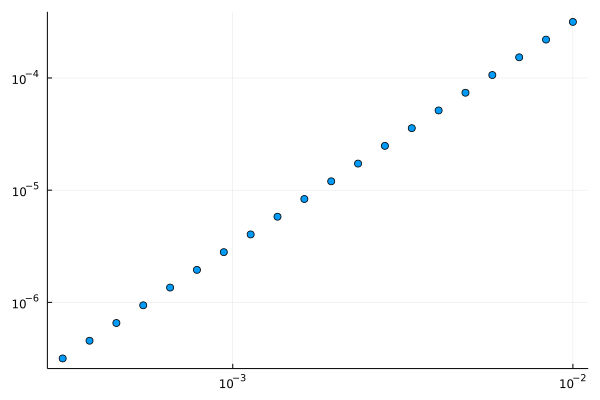

153812
αs = [1.9996712345087864, 5.155412278901507e-5]
βs = [3.1559078156743468, 0.0010856486766572225]
[1.3248586619666414, 3.3881408669704194, 133.71285263851235, 1.1067976134161905, 2.3922012650888768e-14, 1.0, 2.22815649336943, 5.0]


In [33]:
# bad_points = [i for i in 1:N if αs[i, 1] .> 5]
# println(length(bad_points))

# i = bad_points[15]
# is a good one to test 30653
# 16595 still failts
# i = 16595 + 1
GSHEIntegrator.shuffle!(ps)
i = ps[1]
println(i)
# 23147 + 1 is a cool one
# i = 52671 + 1

# In the red ring
# i = 32949

# i = 30408
# Cannot solve: 30408 (+ 0)

println("αs = $(αs[i, :])")
println("βs = $(βs[i, :])")

Xgshe = Xgshes[i, ..]
Xgeo = Xgeos[i, ..]
println(Xgeo)

ϵs = npzread("../data/run_$runID/Epsilons.npy")

dt = abs.(Xgshes[i, :, 3] .- Xgeos[i, 3])
fig = Plots.scatter(ϵs, dt, yscale=:log10, xscale=:log10, legend=nothing)

# Plots.savefig(fig, "~/Downloads/dts.png")

display(fig)

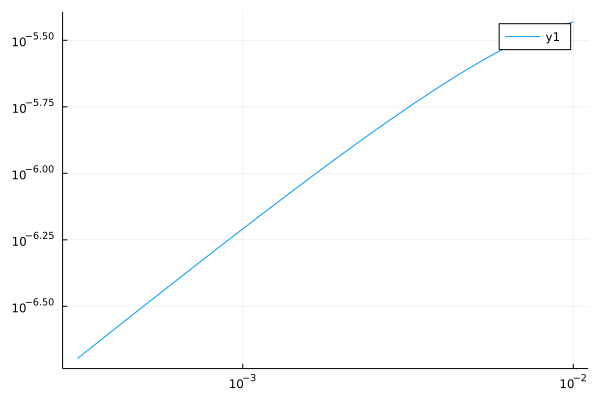

In [34]:
Plots.plot(ϵs, abs.(Xgeo[4] .- Xgshe[:, 4]), xscale=:log10, yscale=:log10)




In [35]:
GSHEIntegrator.bootstrap_powerlaw(ϵs, abs.(Xgeo[4] .- Xgshe[:, 4]))

Dict{String, Vector{Float64}} with 2 entries:
  "alpha" => [0.874659, 0.0219832]
  "beta"  => [0.000254025, 3.71376e-5]

In [23]:
dir = dirs[i, :]

geometry.postproc_options.check_sols = false

ϵs = (10).^(LinRange(-3, -1, 20))


X0 = GSHEIntegrator.time_initial!(dir, ϵs[end], 2, geometry, true)
Xgeo, Xgshe = GSHEIntegrator.time_gshe(X0, geometry, ϵs, 2, false)

# X0 = GSHEIntegrator.time_initial!(dir, ϵs[end], 2, geometry, false)
# ϕkill = pop!(X0)
# nloops = pop!(X0)
# geometry.observer.ϕ = pop!(X0)
# geometry.observer.θ = pop!(X0)
# push!(X0, nloops, ϕkill)


# Xgshe = GSHEIntegrator.solve_decreasing(X0, geometry, 2, ϵs)

5.00%, ϵ=1.00e-01
10.00%, ϵ=7.85e-02
15.00%, ϵ=6.16e-02
20.00%, ϵ=4.83e-02
25.00%, ϵ=3.79e-02
30.00%, ϵ=2.98e-02
35.00%, ϵ=2.34e-02
40.00%, ϵ=1.83e-02
45.00%, ϵ=1.44e-02
50.00%, ϵ=1.13e-02
55.00%, ϵ=8.86e-03
60.00%, ϵ=6.95e-03
65.00%, ϵ=5.46e-03
70.00%, ϵ=4.28e-03
75.00%, ϵ=3.36e-03
80.00%, ϵ=2.64e-03
85.00%, ϵ=2.07e-03
90.00%, ϵ=1.62e-03
95.00%, ϵ=1.27e-03
100.00%, ϵ=1.00e-03


([1.1142393661031182, 3.6418793233792526, 120.27145999799588, 1.1067971810876776, 1.8397820198959477e-14, 0.0, 4.214155888441484, 5.0], [1.1101714782617789 3.6371350661923754 … 4.250196985604916 4.0; 1.1090597041066248 3.635822884674824 … 4.260036266304666 2.0; … ; 0.95344069937772 2.9737788201540463 … 5.620688308582386 8.0; 1.0907194206247761 2.6666156611667438 … 4.490538347855189 0.0])

In [25]:
# sol = GSHEIntegrator.solve_problem(Xgshe[end, 1:2], geometry, ϵs[end], 2)

# geometry.observer.θ = sol[3, 2]
# geometry.observer.ϕ = sol[4, 2]



# GSHEIntegrator.find_consecutive_minimum(geometry, 0, 2, Xgshe[1, 1:2], ϵs[1], 0, 5)

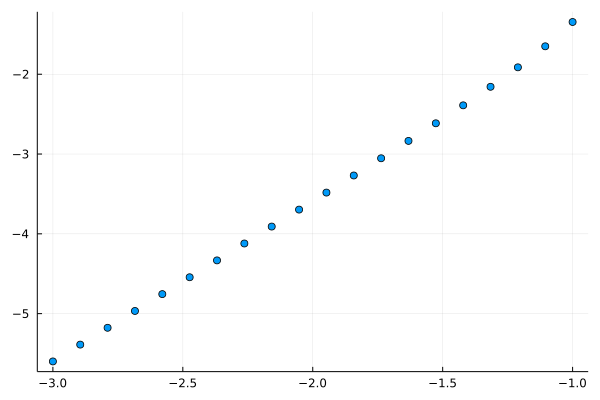

Dict("alpha" => [2.0779827392406394, 0.022468531186951617], "beta" => [3.925679073839174, 0.4639515692619972])


In [26]:
logϵs = log10.(ϵs)
logΔts = log10.(abs.(Xgshe[:, 3] .- Xgeo[3]));
println(GSHEIntegrator.bootstrap_powerlaw(ϵs, (10).^logΔts))
fig = Plots.scatter(logϵs, logΔts, legend=nothing)

Plots.savefig(fig, "~/Downloads/dt.png")

display(fig)

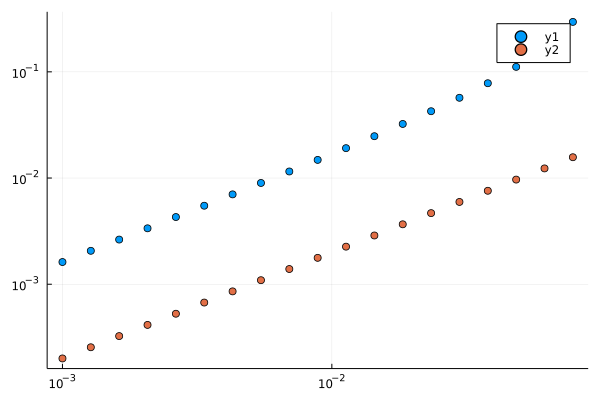

In [27]:
Δσ = [GSHEIntegrator.angdist(Xgshe[j+1, 1:2], Xgshe[j, 1:2]) for j in 1:length(ϵs)-1]
Δϵ = [ϵs[j]  for j in 1:length(ϵs)-1]

Δσ2  = [GSHEIntegrator.getθmax(0.1, ϵ, ϵs[1], Xgshe[end, 6]) for ϵ in ϵs[1:length(ϵs)-1]]


Plots.scatter(Δϵ, Δσ, xscale=:log10, yscale=:log10)
Plots.scatter!(Δϵ, Δσ2)

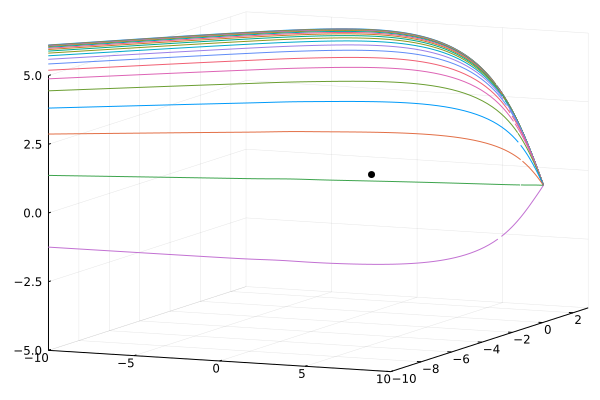

In [28]:
sol = GSHEIntegrator.solve_problem(Xgshe[end, 1:2], geometry, ϵs[end], 2)

geometry.observer.θ = sol[3, 2]
geometry.observer.ϕ = sol[4, 2]


transform(x::Vector{<:Real}) = GSHEIntegrator.spherical_to_cartesian(x, geometry.a)
fig = Plots.plot(xlim=(-10, 10), ylim=(-10,3), zlim=(-5,5), legend=nothing, dpi=300)

# fig = Plots.plot()
for j in 1:size(Xgshe, 1)
    if any(isnan.(Xgshe[j, 1:2]))
        continue
    end
    sol = GSHEIntegrator.solve_problem(Xgshe[j, 1:2], geometry, ϵs[j], 2; save_everystep=true)
    tr = mapslices(transform, sol[2:4, :], dims=1)
    Plots.plot!(fig, [tr[i, :] for i in 1:3]...)
    # @show maximum(sol[3, :]) ./ π
    # Plots.plot!(sol[1, :], sol[3, :] ./π )
end
Plots.scatter!(fig, (0, 0, 0), c="black", label="Black hole")

Plots.savefig(fig, "~/Downloads/sol.png")
display(fig)



In [49]:
function print_vector(f, x, mask)
    print(f, "{")
    N = length(x[mask])
    for i in 1:N
        print(f, x[mask][i])
        if i != N
            print(f, ", ")
        end
    end
    print(f, "}")
end


fpath = "/Users/richard/Downloads/data_upwards.txt"
mask = (.~isnan.(Xgshe[:, 1])) .& (dt .< 1)

open(fpath, "w") do f
    print(f, "epsilons = ")
    print_vector(f, ϵs, mask)
    print(f, " \n \n")

    print(f, "psi = ")
    print_vector(f, Xgshe[:, 1], mask)
    print(f, " \n \n")

    print(f, "rho = ")
    print_vector(f, Xgshe[:, 2], mask)
    print(f, "\n")

end


In [52]:
for j in 1:100
    sol = GSHEIntegrator.solve_problem(Xgshe[j, 1:2], geometry, ϵs[j], 2)
    println("j=$j, t=$(sol[1, end]), ϕ=$(sol[4, end])")
end

j=1, t=141.9575552050915, ϕ=8.735785905673403
j=2, t=141.95755520054936, ϕ=8.73578590567339
j=3, t=141.95755519532668, ϕ=8.735785905673405
j=4, t=141.9575551893219, ϕ=8.735785905673426
j=5, t=141.95755518241756, ϕ=8.735785905673408
j=6, t=141.9575551744788, ϕ=8.735785905673394
j=7, t=141.95755516535104, ϕ=8.73578590567339
j=8, t=141.95755515485624, ϕ=8.735785905673362
j=9, t=157.54994475602936, ϕ=15.018971212852994
j=10, t=157.54994473975523, ϕ=15.01897121285301
j=11, t=157.54994472104482, ϕ=15.018971212853033
j=12, t=157.549944699532, ϕ=15.018971212852987
j=13, t=141.95755507352723, ϕ=8.735785905673394
j=14, t=141.95755504927646, ϕ=8.735785905673382
j=15, t=141.95755502139252, ϕ=8.735785905673362
j=16, t=141.95755498933104, ϕ=8.735785905673414
j=17, t=141.9575549524659, ϕ=8.73578590567339
j=18, t=157.54994448314983, ϕ=15.018971212852973
j=19, t=187.71748953093513, ϕ=27.585341827212197
j=20, t=141.9575548052935, ϕ=8.73578590567341
j=21, t=141.95755474085217, ϕ=8.735785905673374
j=22, t

In [29]:
function print_vector(f, x, mask)
    print("{")
    N = length(x[mask])
    for i in 1:N
        print(x[mask][i])
        if i != N
            print(", ")
        end
    end
    print("}")
end

{0.0001, 0.00010722672220103231, 0.00011497569953977356, 0.0001232846739442066, 0.00013219411484660301, 0.00014174741629268049, 0.0001519911082952933, 0.0001629750834620645, 0.0001747528400007683, 0.0001873817422860385, 0.0002009233002565046, 0.00021544346900318845, 0.00023101297000831605, 0.0002477076355991709, 0.00026560877829466864, 0.0002848035868435802, 0.0003053855508833416, 0.00032745491628777284, 0.0003511191734215135, 0.00037649358067924675, 0.0004037017258596554, 0.00043287612810830614, 0.00046415888336127773, 0.0004977023564332109, 0.0005336699231206312, 0.0005722367659350221, 0.0006135907273413176, 0.0006579332246575682, 0.0007054802310718645, 0.000756463327554629, 0.0008111308307896864, 0.0008697490026177834, 0.0009326033468832209, 0.000999999999999999, 0.0010722672220103231, 0.0011497569953977367, 0.0012328467394420659, 0.0013219411484660286, 0.0014174741629268063, 0.0015199110829529332, 0.0016297508346206436, 0.001747528400007683, 0.001873817422860385, 0.0020092330025650

In [133]:
GSHEIntegrator.angdist([1.8263928713904471, 8.735785905838434], [1.826392148726314, 8.735785906177274])

7.226642076165087e-7

In [116]:
Xgeo, Xgshe = GSHEIntegrator.time_direction(copy(Xgeos[i, 1:2]), geometry, 2, ϵs, false,false)

3.33%, ϵ=1.00e-01
6.67%, ϵ=8.53e-02
10.00%, ϵ=7.28e-02
13.33%, ϵ=6.21e-02
16.67%, ϵ=5.30e-02
20.00%, ϵ=4.52e-02
23.33%, ϵ=3.86e-02
26.67%, ϵ=3.29e-02
30.00%, ϵ=2.81e-02
33.33%, ϵ=2.40e-02
36.67%, ϵ=2.04e-02
40.00%, ϵ=1.74e-02
43.33%, ϵ=1.49e-02
46.67%, ϵ=1.27e-02
50.00%, ϵ=1.08e-02
53.33%, ϵ=9.24e-03
56.67%, ϵ=7.88e-03
60.00%, ϵ=6.72e-03
63.33%, ϵ=5.74e-03
66.67%, ϵ=4.89e-03
70.00%, ϵ=4.18e-03
73.33%, ϵ=3.56e-03
76.67%, ϵ=3.04e-03
80.00%, ϵ=2.59e-03
83.33%, ϵ=2.21e-03
86.67%, ϵ=1.89e-03
90.00%, ϵ=1.61e-03
93.33%, ϵ=1.37e-03
96.67%, ϵ=1.17e-03
100.00%, ϵ=1.00e-03


([0.6302257859548367, 2.5865902922402664, 113.51886282278477, 1.1067972529641796, 2.612763436339564e-14], [0.6302094916628671 2.5866269227970786 … 1.1067981048750108 5.5176997947573095e-14; 0.6302066876375562 2.586633227333232 … 1.1067982514762884 1.993973547228267e-14; … ; 0.628844868406132 2.5897273324945633 … 1.1068694171914406 2.847996765127773e-14; 0.6286088051004347 2.5902705843712317 … 1.1068817308180445 0.0])

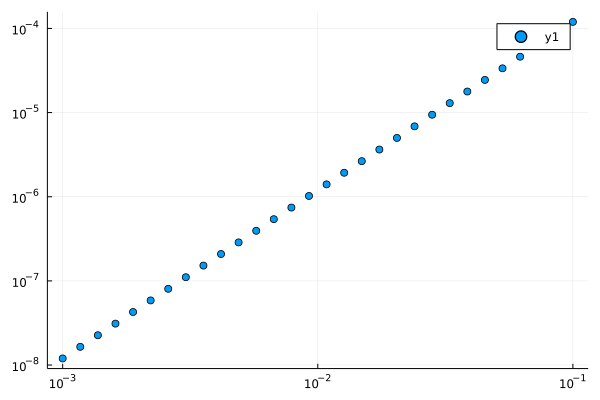

In [117]:
dt = abs.(Xgshe[:, 3] .- Xgeo[3])
Plots.scatter(ϵs, dt, yscale=:log10, xscale=:log10)

In [118]:
GSHEIntegrator.fit_Δts(ϵs, Xgshe, Xgeo, geometry)

Dict{String, Vector{Float64}} with 2 entries:
  "alpha" => [1.99969, 2.28255e-5]
  "beta"  => [0.0119523, 1.4694e-6]

In [92]:
j = 29
sol = GSHEIntegrator.solve_problem(copy(Xgshes[i, j, 1:2]), geometry, ϵs[j], 2)

retcode: Terminated
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
   0.0
 126.64394998578794
u: 2-element Vector{Vector{Float64}}:
 [0.0, 10.0, 1.5707963267948966, 0.0, -1.068262853908749, 1.4474944500858793, 2.136322827057119]
 [145.13145599805245, 99.99999999999993, 1.8889534237595291, 10.134279991325236, 0.9124585737208213, 1.3692903475847356, 2.1032857073969864]

In [93]:
x0 = sol[2:4, end]
# xf = sol[2:4, end]

3-element Vector{Float64}:
 99.99999999999993
  1.8889534237595291
 10.134279991325236

In [95]:
x0 .- xf

3-element Vector{Float64}:
 -5.684341886080802e-14
 -2.2318123793496625e-8
  6.28318530717179

In [ ]:
99.99999999999999
1.888953446077653
3.8510946841534466

In [48]:


# GSHEIntegrator.time_initial()

64 60


In [22]:
N = 15
xs = LinRange(-1, 1, N)
ys = LinRange(-1, 1, N)


Xgeos, Xgshes = GSHEIntegrator.grid_evaluate_timing(xs, ys, ϵs, 2, false, geometry)

Evaluation of 149 points.
n = 146
n = 53
n = 205
n = 106
n = 26
n = 176
n = 114
n = 23
n = 201
n = 41
n = 80
n = 56
n = 71
n = 125
n = 203
n = 218
n = 127
n = 113
n = 86
n = 184
n = 58
n = 200
n = 119
n = 143
n = 122
n = 40
n = 132
n = 185
n = 72
n = 157
n = 107
n = 84
n = 147
n = 102
n = 48
n = 99
n = 73
n = 77
n = 112
n = 131
n = 130
n = 111
n = 35
n = 152
n = 63
n = 172
n = 168
n = 123
n = 178
n = 22
n = 82
n = 110
n = 156
n = 206
n = 148
n = 68
n = 42
n = 154
n = 93
n = 118
n = 51
n = 170
n = 163
n = 129
n = 54
n = 186
n = 149
n = 202
n = 126
n = 88
n = 49
n = 108
n = 98
n = 124
n = 87
n = 138
n = 100
n = 190
n = 140
n = 21
n = 116
n = 128
n = 139
n = 64
n = 191
n = 159
n = 164
n = 173
n = 65
n = 38
n = 189
n = 25
n = 8
n = 79
n = 134
n = 55
n = 62
n = 109
n = 52
n = 83
n = 96
n = 158
n = 153
n = 92
n = 97
n = 117
n = 155
n = 169
n = 57
n = 74
n = 37
n = 171
n = 175
n = 141
n = 67
n = 94
n = 36
n = 101
n = 50
n = 162
n = 34
n = 115
n = 161
n = 66
n = 69
n = 104
n = 188n = 192
n = 8

┌ Warning: Skipping as `prev_init_direction` contains NaNs.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/minimas.jl:66
┌ Warning: Skipping as `prev_init_direction` contains NaNs.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/minimas.jl:66


([NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN;;; NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN;;; NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN;;; NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN;;; NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN])

In [23]:
αs, βs = GSHEIntegrator.fit_timing(ϵs, Xgeos, Xgshes, geometry)

([NaN NaN; NaN NaN; … ; NaN NaN; NaN NaN], [NaN NaN; NaN NaN; … ; NaN NaN; NaN NaN])

In [25]:
reshape(αs[:, 1], N, N)

15×15 Matrix{Float64}:
 NaN        NaN        NaN        …  NaN        NaN        NaN
 NaN        NaN        NaN           NaN        NaN        NaN
 NaN        NaN        NaN           NaN        NaN        NaN
 NaN        NaN          2.00018       1.99993  NaN        NaN
 NaN          2.00017    2.00021       1.99983    2.00003  NaN
 NaN          2.00016    2.00017  …    1.99989    1.99993  NaN
 NaN          2.00016    2.00004       2.00017    1.99988  NaN
   2.00024    2.00038    1.99994       2.00036    1.99953    1.99978
 NaN          1.99999    1.99995       2.00016    1.99996  NaN
 NaN          1.99991    2.00003       1.99999    1.99996  NaN
 NaN          1.99985    2.00001  …    1.99994    1.99983  NaN
 NaN        NaN          1.9999        1.99995  NaN        NaN
 NaN        NaN        NaN           NaN        NaN        NaN
 NaN        NaN        NaN           NaN        NaN        NaN
 NaN        NaN        NaN           NaN        NaN        NaN

In [11]:
Xgeos

225×5 Matrix{Float64}:
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
   1.5708    1.5708   106.453    1.1068    0.0
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
   ⋮                                     
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
   1.5708    4.71239  106.453    1.1068    0.0
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      NaN       NaN
 NaN       NaN        NaN      

In [ ]:
GSHEIntegrator.fit_timing(ϵs, Xgeo, Xgshe, geometry)

In [9]:
reshape(Xgeos[:, 3], N, N)

15×15 Matrix{Float64}:
 NaN      NaN      NaN      NaN      …  NaN      NaN      NaN      NaN
 NaN      NaN      NaN      NaN         NaN      NaN      NaN      NaN
 NaN      NaN      NaN      113.219     113.219  NaN      NaN      NaN
 NaN      NaN      113.123  117.073     117.073  113.123  NaN      NaN
 NaN      110.964  116.057  120.147     120.147  116.057  110.964  NaN
 NaN      113.39   118.004  122.774  …  122.774  118.004  113.39   NaN
 NaN      114.564  119.109  124.558     124.558  119.109  114.564  NaN
 106.453  114.855  119.311  124.686     124.686  119.311  114.855  106.453
 NaN      114.349  118.65   123.23      123.23   118.65   114.349  NaN
 NaN      113.03   117.277  121.064     121.064  117.277  113.03   NaN
 NaN      110.566  115.278  118.631  …  118.631  115.278  110.566  NaN
 NaN      NaN      112.442  115.887     115.887  112.442  NaN      NaN
 NaN      NaN      NaN      112.366     112.366  NaN      NaN      NaN
 NaN      NaN      NaN      NaN         NaN      N

In [162]:
res = GSHEIntegrator.fit_Δts(ϵs, Xgshe, Xgeo, geometry)

Dict{String, Vector{Float64}} with 2 entries:
  "alpha" => [2.00106, 0.000207567]
  "beta"  => [0.0747967, 8.02736e-5]

In [ ]:
GSHEIntegrator._solve_decreasing(p)

In [20]:
i = 2
j = 2

Xgeo, Xgshe = GSHEIntegrator.solve_full(geometries, ϵs, false, 2; perturbation_verbose=false);

# X0

Solving GSHE for geometry 1/3
Solving GSHE for geometry 2/3
Solving GSHE for geometry 3/3


In [32]:
αs, βs = GSHEIntegrator.fit_timing(ϵs, Xgeo, Xgshe, geometries; fit_gshe_gshe=true)

┌ Info: 2 element(s) x=[0.001, 0.0013111339374215656] y=[0.0, 6.963318810448982e-13] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 1 element(s) x=[0.001] y=[9.094947017729282e-13] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95


([2.000572902588643 2.0001094122451337; 2.000655766728131 2.00009563036782; 2.0006750555311745 2.0001179088836083;;; 1.9994511205412873 2.000085321920792; 1.999318091755444 2.0000537816426687; 1.9992825119596354 2.0000037690351213;;; 3.0000945294074532 2.998914698325671; 2.999765826947899 3.0066942846671885; 2.999460356730639 3.0074926117486096;;;; 0.00011206840716708699 3.722373500153161e-5; 0.0001235782544724105 3.0126228822378477e-5; 0.00012707455415775042 3.355381120851051e-5;;; 0.00010681421042028715 3.1989389005214354e-5; 0.00014245679507084874 2.2542168120426203e-5; 0.00015193791693437133 1.13939265631924e-5;;; 0.00023486846225981097 0.008412973061431484; 0.0002149645539960421 0.0022619883357154467; 0.0005548928483903096 0.001474424595236641], [0.5266801953840047 0.28220977940960956; 0.4868235157081244 0.23326929738243765; 0.46547771291884205 0.20702384437885657;;; 0.5231989082637603 0.2821696016692943; 0.48298148826956605 0.23321134705337687; 0.46166064641039306 0.2068845009286

In [35]:
βs[:, 1, 3, 1]

3-element Vector{Float64}:
 0.03410327888490056
 0.03787489352475098
 0.037417128872263984

In [123]:
X0[2, j, :, :]

2×5 Matrix{Float64}:
 2.59502   2.15871  120.313  1.27917  1.16967e-14
 0.649357  4.13324  112.846  1.27941  4.35703e-15

In [119]:
Xgeo

2×5 Matrix{Float64}:
 2.53198   2.11594  120.318  1.27802  2.71424e-14
 0.672448  4.15643  112.844  1.27802  5.76276e-14

In [103]:
i = 1

Xgeos, Xgshes = GSHEIntegrator.solve_full(geometries[i], ϵs, false, 2)

n = 1
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e-03
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.4811623816972808, Δt = 6.593617828422268
Downwards geodesics do not agree, recalculating attempt 1/2.
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e-03
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.481162381697267, Δt = 6.5936178284219125
Downwards geodesics do not agree, recalculating a

LoadError: InterruptException:

In [63]:
Xgshes

3×1×2×18×5 Array{Float64, 5}:
[:, :, 1, 1, 1] =
 0.7099077489298012
 2.5326180583382985
 0.6594703427591336

[:, :, 2, 1, 1] =
 0.7093119271692466
 2.5313411628486873
 0.6590705120746024

[:, :, 1, 2, 1] =
 0.7100004566148724
 2.532816650061786
 0.6595325626186367

[:, :, 2, 2, 1] =
 0.7092192544818917
 2.531142469219232
 0.6590083310456295

[:, :, 1, 3, 1] =
 0.7101220159467758
 2.5330770095186175
 0.6596141491041565

[:, :, 2, 3, 1] =
 0.7090977553136568
 2.5308819345785363
 0.6589268113126548

;;;; … 

[:, :, 1, 16, 1] =
 0.7270221936097836
 2.568860482225121
 0.6709903663922313

[:, :, 2, 16, 1] =
 0.6923622715164627
 2.49461757130889
 0.6477332398865883

[:, :, 1, 17, 1] =
 0.7324736865448721
 2.580219381514637
 0.674673522936444

[:, :, 2, 17, 1] =
 0.6870294863179953
 2.4829103956548444
 0.6441816254954137

[:, :, 1, 18, 1] =
 0.739645959153447
 2.595018083599333
 0.679528733392792

[:, :, 2, 18, 1] =
 0.6800616287039167
 2.467508685048131
 0.6395527252263327

[:, :, 1, 1, 2] =


In [41]:
GSHEIntegrator.toarray(X0)

3×2×5 Array{Float64, 3}:
[:, :, 1] =
 0.70961   2.4407
 0.672448  2.53198
 2.57953   0.65927

[:, :, 2] =
 4.25448  2.16048
 4.15643  2.11594
 2.07309  4.09642

[:, :, 3] =
 113.101  119.695
 112.844  120.318
 120.739  112.69

[:, :, 4] =
 1.27802  1.27802
 1.27802  1.27802
 1.27802  1.27802

[:, :, 5] =
 1.34772e-14  3.50755e-14
 2.35275e-14  1.87595e-14
 9.46758e-15  6.45756e-14

In [17]:
Xgeo, Xgshe = GSHEIntegrator._solve_decreasing(X0, geometry, ϵs)

5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e-03


([0.7096098137142561 4.25448283146318 … 1.2780193319779614 2.020576614261806e-14; 2.4406954776224428 2.1604838049030066 … 1.2780193319779614 6.618935840834869e-14], [0.7099077489298198 0.7100004566149456 … 0.732473686544862 0.7396459591534025; 2.4400210521696915 2.439811179958397 … 2.3887963695230385 2.507148151179832;;; 4.254685872345554 4.254748999194993 … 4.269340184703767 4.273713291078597; 2.1600748969611154 2.1599478827595706 … 2.132089520598194 2.2070748953659156;;; 113.10112161597844 113.10112181878328 … 113.10276278230204 113.10394405715893; 119.69473863748095 119.6947382600611 … 119.69169316495993 119.68947263165553;;; 1.2780093685206184 1.2780062670098333 … 1.2772378255801613 1.2769857928518156; 1.2780101884559671 1.2780073390673017 … 1.277259752431783 1.2788181339275526;;; 3.67716340048029e-15 5.047590088724009e-14 … 2.478738276563654e-15 3.590938950151281e-14; 6.084803305079163e-15 3.3230916477676293e-14 … 1.3905253938695445e-14 1.574858214253824e-14])

In [18]:
Xgeo

2×5 Matrix{Float64}:
 0.70961  4.25448  113.101  1.27802  2.02058e-14
 2.4407   2.16048  119.695  1.27802  6.61894e-14

In [11]:
Xgeo, Xgshe = GSHEIntegrator.solve_full(geometries, ϵs, false, 2, true; perturbation_verbose=false);

Solving GSHE for geometry 1/3
Solving GSHE for geometry 3/3
Solving GSHE for geometry 2/3
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.517634716905105, Δt = 8.048999516490412
Downwards geodesics do not agree, recalculating attempt 1/2.
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.4811623816972777, Δt = 6.593617828422111
Downwards geodesics do not agree, recalculating attempt 1/2.
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.50277749026148, Δt = 7.474619029391647
Downwards geodesics do not agree, recalculating attempt 1/2.
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.4811623816972666, Δt = 6.593617828422822
Downwards geodesics do not agree, recalculating attempt 2/2.
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.5027774902614732, Δt = 7.474619029394447
Downwards geodesics do not agree, recalculating attempt 2/2.
Geodesics from downwards ϵ ladder did not converge, Δσ = 2.517634716905128, Δt = 8.048999516495954
Downwards

LoadError: TaskFailedException

[91m    nested task error: [39mMethodError: no method matching check_gshes!(::Array{Float64, 3}, ::Matrix{Float64}, ::GSHEIntegrator.Geometry{Float64}, ::Vector{Float64})
    [0mClosest candidates are:
    [0m  check_gshes!(::Array{<:Real, 3}, [91m::Vector{<:Real}[39m, ::GSHEIntegrator.Geometry, ::Union{LinRange{<:Real}, Vector{<:Real}}) at ~/Projects/birefringence/GSHEIntegrator/src/outliers.jl:112
    Stacktrace:
     [1] [0m[1msolve_decreasing[22m[0m[1m([22m[90mXmax[39m::[0mMatrix[90m{Float64}[39m, [90mgeometry[39m::[0mGSHEIntegrator.Geometry[90m{Float64}[39m, [90mϵs[39m::[0mVector[90m{Float64}[39m; [90mverbose[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mGSHEIntegrator[39m [90m~/Projects/birefringence/GSHEIntegrator/src/[39m[90m[4msolver.jl:179[24m[39m
     [2] [0m[1msolve_decreasing[22m[0m[1m([22m[90mXmax[39m::[0mArray[90m{Float64, 3}[39m, [90mgeometry[39m::[0mGSHEIntegrator.Geometry[90m{Float64}[39m, [90mϵs[39m::[0mVector[90m{Float64}[39m; [90mverbose[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mGSHEIntegrator[39m [90m~/Projects/birefringence/GSHEIntegrator/src/[39m[90m[4msolver.jl:213[24m[39m
     [3] [0m[1msolve_full[22m[0m[1m([22m[90mgeometry[39m::[0mGSHEIntegrator.Geometry[90m{Float64}[39m, [90mϵs[39m::[0mVector[90m{Float64}[39m, [90mincreasing_ϵ[39m::[0mBool, [90mNsols[39m::[0mInt64; [90mperturbation_verbose[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mGSHEIntegrator[39m [90m~/Projects/birefringence/GSHEIntegrator/src/[39m[90m[4msolver.jl:436[24m[39m
     [4] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/Projects/birefringence/GSHEIntegrator/src/[39m[90m[4msolver.jl:461[24m[39m[90m [inlined][39m
     [5] [0m[1m(::GSHEIntegrator.var"#311#threadsfor_fun#109"{Bool, Bool, Vector{GSHEIntegrator.Geometry{Float64}}, Vector{Float64}, Bool, Int64, Int64, Vector{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mGSHEIntegrator[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [6] [0m[1m(::GSHEIntegrator.var"#311#threadsfor_fun#109"{Bool, Bool, Vector{GSHEIntegrator.Geometry{Float64}}, Vector{Float64}, Bool, Int64, Int64, Vector{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mGSHEIntegrator[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [ ]:
X = GSHEIntegrator.solve_full(geometries, ϵs, true, 2; perturbation_verbose=false)

LoadError: UndefVarError: GSHEIntegrator not defined

In [34]:
GSHEIntegrator.toarray(X0)

LoadError: MethodError: no method matching toarray(::Array{Float64, 4})
[0mClosest candidates are:
[0m  toarray([91m::Vector{<:Array{<:Real}}[39m) at ~/Projects/birefringence/GSHEIntegrator/src/setup.jl:219

In [19]:
GSHEIntegrator.sort_configurations!(Xgeos, Xgshes)

In [17]:
Xgeos[1, ..]

2×5 Matrix{Float64}:
 0.70961  4.25448  113.101  1.27802  6.54951e-15
 2.4407   2.16048  119.695  1.27802  2.22681e-14

In [62]:
αs, βs =  GSHEIntegrator.fit_timing(ϵs, Xgeos, Xgshes, geometries)

αs

3×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 2.00011  2.00057
 2.00009  2.00066
 2.00068  2.00012

[:, :, 2, 1] =
 2.00009  1.99945
 2.00005  1.99931
 1.99928  2.0

[:, :, 1, 2] =
 3.67012e-5   0.000111818
 3.16442e-5   0.000128567
 0.000127911  3.29149e-5

[:, :, 2, 2] =
 3.14781e-5   0.000109227
 2.35381e-5   0.000139215
 0.000143589  1.08404e-5

In [ ]:
GSHEIntegrator.fit_timing

In [27]:
Xgshe = GSHEIntegrator.solve_increasing(X, geometries, ϵs, true, false)

Solving GSHE for 3 configurations.
Solving GSHE for geometry 3/3
Solving GSHE for geometry 1/3
Solving GSHE for geometry 2/3


3×2×2×18×5 Array{Float64, 5}:
[:, :, 1, 1, 1] =
 2.44137  0.709908
 2.53262  0.672682
 0.65947  2.58015

[:, :, 2, 1, 1] =
 2.44002   0.709312
 2.53134   0.672214
 0.659071  2.57891

[:, :, 1, 2, 1] =
 2.44158   0.71
 2.53282   0.672754
 0.659533  2.58034

[:, :, 2, 2, 1] =
 2.43981   0.709219
 2.53114   0.672142
 0.659008  2.57871

[:, :, 1, 3, 1] =
 2.44185   0.710122
 2.53308   0.67285
 0.659614  2.58059

[:, :, 2, 3, 1] =
 2.43954   0.709098
 2.53088   0.672046
 0.658927  2.57846

;;;; … 

[:, :, 1, 16, 1] =
 2.47961  0.727022
 2.56886  0.686127
 0.67099  2.61544

[:, :, 2, 16, 1] =
 2.40119   0.692362
 2.49462   0.658949
 0.647733  2.54322

[:, :, 1, 17, 1] =
 2.49157   0.732474
 2.58022   0.69042
 0.674674  2.62652

[:, :, 2, 17, 1] =
 2.3888    0.687029
 2.48291   0.654787
 0.644182  2.53186

[:, :, 1, 18, 1] =
 2.50715   0.739646
 2.59502   0.696074
 0.679529  2.64097

[:, :, 2, 18, 1] =
 2.37248   0.680062
 2.46751   0.649357
 0.639553  2.51692

[:, :, 1, 1, 2] =
 2.16089  4.2

In [18]:
X[1]

2×2×5 Array{Float64, 3}:
[:, :, 1] =
 2.50715   0.680062
 0.739646  2.37248

[:, :, 2] =
 2.20707  4.23299
 4.27371  2.12432

[:, :, 3] =
 119.689  113.104
 113.104  119.69

[:, :, 4] =
 1.27882  1.27898
 1.27699  1.277

[:, :, 5] =
 5.60153e-15  8.94066e-15
 1.76061e-14  3.83921e-14

In [16]:
GSHEIntegrator.solve_increasing(X, geometries, ϵs, true, false)

Solving GSHE for 3 configurations.
Solving GSHE for geometry 3/3
Solving GSHE for geometry 2/3
Solving GSHE for geometry 1/3


3-element Vector{Array{Float64, 4}}:
 [0.7099077489298312 0.709311927169195; 2.441369728258455 2.440021052169726;;; 0.7100004566148679 0.7092192544818923; 2.4415794747635937 2.439811179958445;;; 0.7101220159467325 0.709097755313618; 2.441854454768286 2.439535983855656;;; … ;;; 0.7270221936097901 0.6923622715165733; 2.4796062500359506 2.4011912972679115;;; 0.7324736865448718 0.6870294863179888; 2.491572175058089 2.3887963695230416;;; 0.7396459591534316 0.680061628703896; 2.507148151179802 2.372478384526149;;;; 4.254685872345561 4.254279564545493; 2.160893749001037 2.160074896961133;;; 4.254748999194954 4.254216275160362; 2.161021508274408 2.1599478827595995;;; 4.254831733852999 4.254133261091563; 2.161189170277417 2.1597815015906106;;; … ;;; 4.265927102193951 4.242273238122707; 2.186142642293112 2.1383387781661267;;; 4.26934018470377 4.238309274173695; 2.194927999407244 2.1320895205981962;;; 4.27371329107859 4.2329880682386385; 2.207074895365891 2.124320799470529;;;; 113.10112161597841 

In [7]:
Xgeos, Xgshes = GSHEIntegrator.solve_decreasing(X, geometries, ϵs, false, true)

n = 1
n = 1
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
n = 1
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
16.67%, ϵ=5.82e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
22.22%, ϵ=4.44e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
27.78%, ϵ=3.38e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
33.33%, ϵ=2.58e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
38.89%, ϵ=1.97e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
44.44%, ϵ=1.50e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
50.00%, ϵ=1.15e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
55.56%, ϵ=8.73e-03
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
61.11%, ϵ=6.66e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
66.67%, ϵ=5.08e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
72.22%, ϵ=3.87e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
77.78%, ϵ=2.96e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
83.33%, ϵ=2.25e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
88.89%, ϵ=1.72e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
94.44%, ϵ=1.31e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e

([[0.7096098137142137 2.440695477622407; 2.440695477622458 0.70960981371423;;; 4.254482831463154 2.160483804902999; 2.1604838049030333 4.25448283146317;;; 113.10112133394192 119.69473916236362; 119.69473916236403 113.10112133394038;;; 1.278019331977961 1.2780193319779618; 1.2780193319779598 1.2780193319779625;;; 1.1449599402270647e-14 5.305837127340147e-15; 2.936583031436328e-14 2.1695943686672812e-15], [0.6724479084517471 0.6724479084517597; 2.5319796814526385 2.5319796814526065;;; 4.156428715226079 4.156428715226098; 2.115944987281301 2.1159449872812766;;; 112.84364593688785 112.84364593688791; 120.3182649662819 120.31826496628268;;; 1.27801938054448 1.278019380544479; 1.278019380544479 1.27801938054448;;; 4.8789389617537835e-15 9.05239868147492e-15; 1.843330510969933e-14 1.2512869584890468e-14], [0.6592704004163926 0.6592704004163248; 2.5795264200622956 2.5795264200623107;;; 4.0964229641077115 4.096422964107607; 2.073089103888243 2.07308910388825;;; 112.68994782397868 112.6899478239

In [65]:
X0 = X[1]
# X0 = X[1][1, :]

Xgeos, Xgshes = GSHEIntegrator.solve_decreasing(X0, geometries[1], ϵs)
# Xgshe, Xgeo = GSHEIntegrator.solve_from_max_gshe(X0, geometries[1], ϵs);

# GSHEIntegrator.solve_from_geodesic(X0, geometries[1], ϵs)

n = 1
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e-03
n = 2
5.56%, ϵ=1.00e-01
11.11%, ϵ=7.63e-02
16.67%, ϵ=5.82e-02
22.22%, ϵ=4.44e-02
27.78%, ϵ=3.38e-02
33.33%, ϵ=2.58e-02
38.89%, ϵ=1.97e-02
44.44%, ϵ=1.50e-02
50.00%, ϵ=1.15e-02
55.56%, ϵ=8.73e-03
61.11%, ϵ=6.66e-03
66.67%, ϵ=5.08e-03
72.22%, ϵ=3.87e-03
77.78%, ϵ=2.96e-03
83.33%, ϵ=2.25e-03
88.89%, ϵ=1.72e-03
94.44%, ϵ=1.31e-03
100.00%, ϵ=1.00e-03


In [76]:
x = [1, 1]
y = [2, 2]

2-element Vector{Int64}:
 2
 2

In [78]:
x[2], y[2] = [3, 3]

2-element Vector{Int64}:
 3
 3

In [74]:
x

2-element Vector{Int64}:
 1
 3

In [75]:
y

2-element Vector{Int64}:
 2
 3

In [70]:
Xgeos

2×2×5 Array{Float64, 3}:
[:, :, 1] =
 0.70961  0.70961
 2.4407   2.4407

[:, :, 2] =
 4.25448  4.25448
 2.16048  2.16048

[:, :, 3] =
 113.101  113.101
 119.695  119.695

[:, :, 4] =
 1.27802  1.27802
 1.27802  1.27802

[:, :, 5] =
 2.63019e-14  9.17157e-15
 1.50632e-14  2.74102e-14

In [42]:
GSHEIntegrator.solve_full(X0, geometries[1], ϵs, false)

n = 1


LoadError: MethodError: no method matching solve_from_max_gshe(::Vector{Float64}, ::GSHEIntegrator.Geometry{Float64}, ::Vector{Float64}; verbose=true)
[0mClosest candidates are:
[0m  solve_from_max_gshe([91m::Matrix{<:Real}[39m, ::GSHEIntegrator.Geometry, ::Union{LinRange{<:Real}, Vector{<:Real}}; verbose) at ~/Projects/birefringence/GSHEIntegrator/src/setup.jl:248

In [29]:
dt = abs.(Xgshe[1, :, 3] .- Xgeo[1, 3])

18-element Vector{Float64}:
 2.8203626811773574e-7
 4.848411236935135e-7
 8.334772161333603e-7
 1.4328081050507535e-6
 2.463102745764445e-6
 4.234256024915339e-6
 7.279003497728809e-6
 1.2513164961092116e-5
 2.1511116713668343e-5
 3.6979386806024195e-5
 6.357084949115688e-5
 0.00010928458458181467
 0.00018787288459520823
 0.00032298067068836644
 0.0005552661178995777
 0.0009546551985977203
 0.0016414483601039365
 0.0028227232167523653

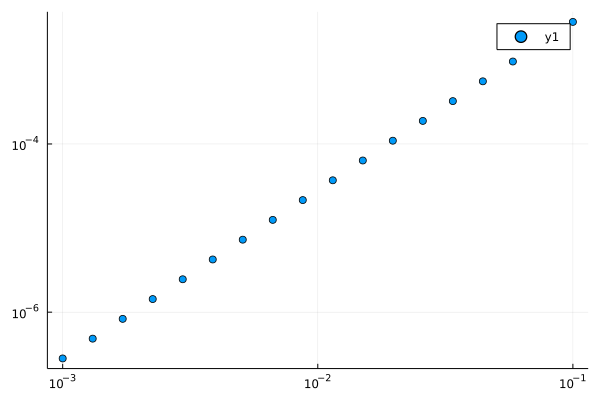

In [25]:
fig = Plots.plot(xscale=:log10, yscale=:log10)

Plots.scatter!(fig, ϵs, dt)



In [32]:
x = zeros(3)
y = zeros(3)


a = [1, 2, 3]
b = [2, 3, 3]

3-element Vector{Int64}:
 2
 3
 3

In [36]:
(x[:], y[:]) .= a, b

LoadError: MethodError: no method matching copyto!(::Tuple{Vector{Float64}, Vector{Float64}}, ::Base.Broadcast.Broadcasted{Base.Broadcast.Style{Tuple}, Tuple{Base.OneTo{Int64}}, typeof(identity), Tuple{Tuple{Vector{Int64}, Vector{Int64}}}})
[0mClosest candidates are:
[0m  copyto!(::Any, [91m::ArrayLayouts.Mul[39m) at ~/.julia/packages/ArrayLayouts/CV0IA/src/mul.jl:113
[0m  copyto!(::Any, [91m::ArrayLayouts.Lmul[39m) at ~/.julia/packages/ArrayLayouts/CV0IA/src/lmul.jl:65
[0m  copyto!(::Any, [91m::ArrayLayouts.Rmul[39m) at ~/.julia/packages/ArrayLayouts/CV0IA/src/lmul.jl:67
[0m  ...

In [64]:
GSHEIntegrator.find_consecutive_minimum(geometries[1], 0, 2, Xgshe[1, 1, 1:2])

5-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
   0.3090972927621683

In [66]:
GSHEIntegrator.find_initial_minima(geometries[1], 0, 2, 2)

2×5 Matrix{Float64}:
 0.70961  4.25448  113.101  1.27802  7.33963e-15
 2.4407   2.16048  119.695  1.27802  1.17037e-14

In [53]:
Xgshe[1, :, 3]

18-element Vector{Float64}:
 113.10112161597854
 113.10112181878293
 113.10112216741904
 113.10112276675031
 113.10112379704482
 113.10112556819816
 113.10112861294556
 113.10113384710674
 113.10114284505867
 113.10115831332959
 113.10118490479154
 113.10123061852683
 113.10130920682671
 113.10144431461268
 113.10167660005968
 113.1020759891406
 113.10276278230215
 113.1039440571591

In [203]:
n = 1
s = 1
X[2][n, s, :]

5-element Vector{Float64}:
   2.865879636201103
   3.4473787296214846
 119.91408108420481
   1.2739341742310022
   5.794568790626963e-14

In [201]:
119.94219497710489 - 119.91408108420481

0.028113892900080373

In [159]:
119.69473916236268 - 119.69473916236404

-1.3642420526593924e-12

In [58]:
ϵs = (10).^LinRange(-3, log10(0.9), 20)

geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=5, θsource=0.5π, ϕsource=0,
   robs=100, θobs=0.5π , ϕobs=π, a=0.8);



In [59]:
# GSHEIntegrator.solve_problem([0.2, 0.3], geometry, 0.1, 2)
loss = GSHEIntegrator.setup_initial_loss(geometry, 0.1, 2);

In [65]:
X = GSHEIntegrator.find_initial_minima(geometry, 0.05, 2, 1)[1, :]

5-element Vector{Float64}:
   2.9270474897103385
   3.463749449794359
 117.73317648215978
   1.2779204314926231
   2.0915129650864316e-13

In [66]:
z = GSHEIntegrator.find_consecutive_minimum(geometry, 0, 2, X)

5-element Vector{Float64}:
   2.9387704133456953
   3.1415926535899894
 117.73606045197242
   1.2780193008453873
   1.2049501327153687e-14

In [106]:
X = GSHEIntegrator.find_initial_minima(geometry, 0.1, 2, 2)

2×5 Matrix{Float64}:
 0.517451  3.14159  115.02   1.27802  6.12537e-15
 2.93877   3.14159  117.736  1.27802  1.72282e-14

In [130]:
X = Vector{Array{Float64}}(undef, 10)

10-element Vector{Array{Float64}}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [133]:
X[3] = fill!(Array{Float64}(undef, 2, 1, 3), NaN)

2×1×3 Array{Float64, 3}:
[:, :, 1] =
 NaN
 NaN

[:, :, 2] =
 NaN
 NaN

[:, :, 3] =
 NaN
 NaN

In [134]:
X

10-element Vector{Array{Float64}}:
    [NaN; NaN;;; NaN; NaN;;; NaN; NaN]
 #undef
    [NaN; NaN;;; NaN; NaN;;; NaN; NaN]
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [123]:
X

4-element Vector{Array{Float64}}:
 [0.0; 2.5978617817e-314;;; 2.597833126e-314; 0.0;;; 2.5978617817e-314; 2.597833126e-314]
 [2.889130373e-314; 2.889130389e-314;;; 2.622284822e-314; 2.163967395e-314;;; 2.1639673e-314; 2.889130705e-314]
 [2.233799637826419e-308; 2.586523956962534e-231;;; 2.586563117045738e-231; 1.33144834e-315;;; 0.0; 0.0]
 [0.0; 5.0e-324;;; 2.858639732e-314; 1.0e-323;;; 5.0e-324; 2.8586397327e-314]

In [82]:
N  = 2
dtype = Float64
X = Vector{Matrix{dtype}}(undef, N)

2-element Vector{Matrix{Float64}}:
 #undef
 #undef

In [101]:
X = Vector{Matrix{BigFloat}}()

Matrix{BigFloat}[]

In [104]:
push!(X, fill(NaN, 2, 3, 4))

LoadError: MethodError: no method matching Matrix{BigFloat}(::Array{Float64, 3})
[0mClosest candidates are:
[0m  Array{T, N}(::AbstractArray{S, N}) where {T, N, S} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/array.jl:563
[0m  Matrix{T}([91m::LinearAlgebra.UnitUpperTriangular[39m) where T at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/triangular.jl:183
[0m  Matrix{T}([91m::LinearAlgebra.SymTridiagonal[39m) where T at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/tridiag.jl:125
[0m  ...

In [ ]:
X

In [94]:
fill(NaN, 2, 3)

2×3 Matrix{Float64}:
 NaN  NaN  NaN
 NaN  NaN  NaN

In [63]:
z[2] -  π

5.049294315995212e-13

In [65]:
loss = GSHEIntegrator.setup_initial_loss(geometry, 0.9, 2);

In [66]:
loss([0.2, 0.3])

1.5197245417624223

In [59]:
GSHEIntegrator.consecutive_loss([0.5, 0.0], [0.2, 0.3], solver, geometry, 0.4)


1.6813703405674487

In [52]:
GSHEIntegrator.atan_transform(-500000000, 0.4) + 0.4

1.5707963273041923

In [33]:
loss([0.2, 0.3])

1.5168679118790298

In [10]:
loss([0.2, 0.3])

LoadError: MethodError: no method matching (::GSHEIntegrator.var"#solver#57"{GSHEIntegrator.var"#solver#56#58"{GSHEIntegrator.Geometry{Float64}, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, GSHEIntegrator.Geometry{Float64}, SciMLBase.ODEFunction{true, GSHEIntegrator.var"#odes!#35"{Int64}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, SciMLBase.CallbackSet{Tuple{SciMLBase.ContinuousCallback{GSHEIntegrator.var"#f#18"{GSHEIntegrator.Geometry{Float64}}, GSHEIntegrator.var"#terminate_affect!#19", GSHEIntegrator.var"#terminate_affect!#19", typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Int64, Int64}}, Tuple{SciMLBase.DiscreteCallback{GSHEIntegrator.var"#f#20"{Float64}, GSHEIntegrator.var"#terminate_affect!#21", typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, SciMLBase.DiscreteCallback{GSHEIntegrator.var"#f#24"{GSHEIntegrator.Geometry{Float64}}, GSHEIntegrator.var"#terminate_affect!#25", typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, SciMLBase.DiscreteCallback{GSHEIntegrator.var"#f#22"{Float64, Float64}, GSHEIntegrator.var"#terminate_affect!#23", typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}}})(::Vector{Float64})
[0mClosest candidates are:
[0m  (::GSHEIntegrator.var"#solver#57")(::Vector{<:Real}, [91m::Vector{<:Real}[39m; save_everystep) at ~/Projects/birefringence/GSHEIntegrator/src/setup.jl:149

In [61]:
geometry.ode_options.Δθ = 0
geometry.ode_options.maxiters=5000
geometry.ode_options.no_loops=true
geometry.ode_options.horizon_tol = 1.001
geometry.opt_options.Nattempts_gshe=15
geometry.postproc_options.check_gshe_sols = false

false

In [62]:
Xgeo = GSHEIntegrator.find_geodesic_minima(geometry, 2)

2×5 Matrix{Float64}:
 3.00818  3.14159  520.688  1.28841  2.78921e-14
 0.56587  3.14159  518.488  1.28841  3.88882e-14

In [64]:
Xgshe = GSHEIntegrator.solve_gshe(Xgeo[2, 1:2], geometry, ϵs)

5.00%, ϵ=1.00e-03
min_loss = 2.8324398327409694e-14
min_loss = 8.545111909127925e-15
10.00%, ϵ=1.43e-03
min_loss = 6.393188222769894e-15
min_loss = 4.690189695540435e-14
15.00%, ϵ=2.05e-03
min_loss = 1.7696829641852286e-14
min_loss = 3.0636523395993796e-14
20.00%, ϵ=2.93e-03
min_loss = 2.1628557899130955e-14
min_loss = 1.9860273225978185e-15
25.00%, ϵ=4.19e-03
min_loss = 1.1901673676157817e-13
min_loss = 2.6216312930574477e-14
30.00%, ϵ=5.99e-03
min_loss = 1.2947314098277874e-14
min_loss = 4.189529226675416e-15
35.00%, ϵ=8.57e-03
min_loss = 2.787522182230478e-14
min_loss = 3.580361673049448e-15
40.00%, ϵ=1.23e-02
min_loss = 6.174756651204528e-14
min_loss = Inf
min_loss = 3.202988615714901e-14
45.00%, ϵ=1.75e-02
min_loss = Inf
min_loss = Inf
min_loss = 1.120830491896282e-14
min_loss = 9.136265349348076e-15
50.00%, ϵ=2.51e-02
min_loss = 2.9777166713245526e-14
min_loss = 8.981148454337477e-15
55.00%, ϵ=3.59e-02
min_loss = Inf
min_loss = 2.9790409838967277e-15
min_loss = Inf
min_loss = Inf

LoadError: InterruptException:

In [46]:
Xgshe[1, :, :]

30×5 Matrix{Float64}:
 2.99322  3.15008  521.193  1.28841  2.33756e-14
 2.99322  3.15233  521.193  1.28841  1.78507e-14
 2.99322  3.15516  521.193  1.28841  2.28401e-14
 2.99321  3.15875  521.193  1.28841  1.82317e-14
 2.99319  3.16329  521.193  1.28841  1.87066e-14
 2.99317  3.16902  521.193  1.28841  2.44039e-14
 2.99314  3.17626  521.193  1.28841  1.19407e-14
 2.99308  3.18542  521.193  1.28841  4.365e-14
 2.99299  3.19698  521.193  1.28841  2.72917e-14
 2.99285  3.21158  521.193  1.28841  3.07511e-14
 2.99262  3.22999  521.193  1.2884   7.06486e-14
 2.99225  3.25317  521.193  1.2884   2.5633e-14
 2.99167  3.28229  521.193  1.2884   3.82352e-15
 ⋮                                   
 2.96907  3.66297  521.188  1.28819  1.59662e-14
 2.95607  3.7675   521.185  1.28807  4.0431e-14
 2.93698  3.87839  521.18   1.28786  8.88516e-15
 2.90961  3.98956  521.172  1.28753  3.82352e-15
 2.87137  4.0945   521.159  1.28702  1.33009e-13
 2.81913  4.18775  521.139  1.28619  1.12074e-14
 2.74892  4.2

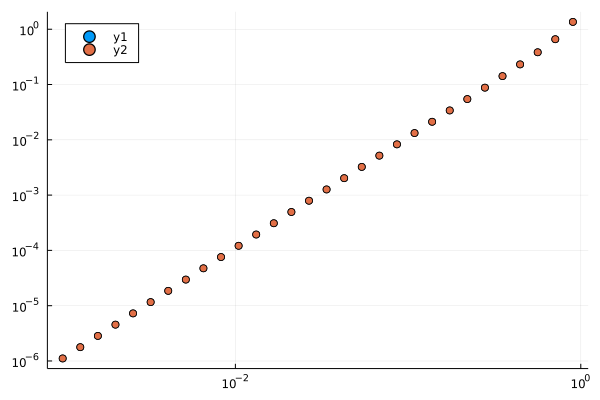

In [47]:
fig = Plots.plot(xscale=:log10, yscale=:log10, legend=:topleft)

for s in 1:2
    dt = abs.(Xgeo[1, 3] .- Xgshe[s, :, 3])
    Plots.scatter!(fig, ϵs, dt)
end

display(fig)


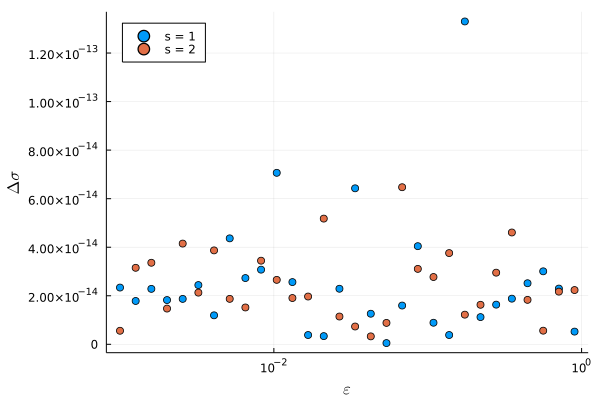

In [48]:
fig = Plots.plot(xscale=:log10, legend=:topleft, dpi=300,
                xlabel=L"\epsilon", ylabel=L"\Delta \sigma")
for s in 1:2
    label = "s = $s"
    Plots.scatter!(ϵs, Xgshe[s, :, 5], label=label)
end

Plots.savefig(fig, "~/Downloads/cone.png")

display(fig)

In [146]:
GSHEIntegrator.fit_Δts(ϵs, Xgshe, Xgeo[2, :], geometry)

┌ Info: 11 element(s) x=[0.016004322277290886, 0.01693610584916736, 0.017922138555107523, 0.018965578820131352, 0.020069768955117702, 0.02123824586277598, 0.02247475236692756, 0.023783249201386462, 0.025167927696841473, 0.026633223206378145, 0.028183829312644536] y=[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 11 element(s) x=[0.016004322277290886, 0.01693610584916736, 0.017922138555107523, 0.018965578820131352, 0.020069768955117702, 0.02123824586277598, 0.02247475236692756, 0.023783249201386462, 0.025167927696841473, 0.026633223206378145, 0.028183829312644536] y=[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95


2-element Vector{Any}:
 Dict("alpha" => [2.0980569036048773, 0.019454528308626557], "beta" => [100.8203152265156, 11.69100893781758])
 Dict("alpha" => [2.099082119110367, 0.019519431163855364], "beta" => [101.38813054080309, 11.734045478449339])

In [344]:

N = 250
θs = Vector(LinRange(0, π, N))
ϕs = Vector(LinRange(0.5π, 1.5π, N))


# θ0 = 1.5673905371786785 + 0.002
# ϕ0 = 4.129209558760584
# Δ = 0.0025
# θs = Vector(LinRange(θ0 - Δ, θ0 + Δ, N))
# ϕs = Vector(LinRange(ϕ0 - Δ, ϕ0 + Δ, N))

loss = GSHEIntegrator.setup_geodesic_loss(geometry);
Z = GSHEIntegrator.grid_evaluate_scalar(loss, θs, ϕs);

In [345]:
# GSHEIntegrator.find_geodesic_minimum(loss, geometry)
Xgeo = GSHEIntegrator.find_geodesic_minima(geometry, 2)

opt.minimum = 3.594332718360645e-14
opt.minimum = 0.9414831556163161
opt.minimum = 1.6699388084357171e-10
opt.minimum = Inf
opt.minimum = 1.6712603974128935e-10
opt.minimum = Inf
opt.minimum = 2.3100316177467918e-14


2×4 Matrix{Float64}:
 2.7779    3.21679  116.282  1.27736
 0.376065  3.07049  116.175  1.27736

In [346]:
Xgshe = GSHEIntegrator.solve_gshe(Xgeo, geometry, ϵs)

n = 1
5.56%, ϵ=1.00e-03
11.11%, ϵ=1.31e-03
16.67%, ϵ=1.72e-03
22.22%, ϵ=2.25e-03
27.78%, ϵ=2.96e-03
33.33%, ϵ=3.87e-03
38.89%, ϵ=5.08e-03
44.44%, ϵ=6.66e-03
50.00%, ϵ=8.73e-03
55.56%, ϵ=1.15e-02
61.11%, ϵ=1.50e-02
66.67%, ϵ=1.97e-02
72.22%, ϵ=2.58e-02
77.78%, ϵ=3.38e-02
83.33%, ϵ=4.44e-02
88.89%, ϵ=5.82e-02
94.44%, ϵ=7.63e-02
100.00%, ϵ=1.00e-01
n = 2
5.56%, ϵ=1.00e-03
11.11%, ϵ=1.31e-03
16.67%, ϵ=1.72e-03
22.22%, ϵ=2.25e-03
27.78%, ϵ=2.96e-03
33.33%, ϵ=3.87e-03
38.89%, ϵ=5.08e-03
44.44%, ϵ=6.66e-03
50.00%, ϵ=8.73e-03
55.56%, ϵ=1.15e-02
61.11%, ϵ=1.50e-02
66.67%, ϵ=1.97e-02
72.22%, ϵ=2.58e-02
77.78%, ϵ=3.38e-02
83.33%, ϵ=4.44e-02
88.89%, ϵ=5.82e-02
94.44%, ϵ=7.63e-02
100.00%, ϵ=1.00e-01


2×2×18×4 Array{Float64, 4}:
[:, :, 1, 1] =
 2.77437   2.77897
 0.375075  0.37936

[:, :, 2, 1] =
 2.77279   2.7788
 0.375241  0.380848

[:, :, 3, 1] =
 2.77036   2.77821
 0.375801  0.383126

;;; … 

[:, :, 16, 1] =
 NaN  NaN
 NaN  NaN

[:, :, 17, 1] =
 NaN  NaN
 NaN  NaN

[:, :, 18, 1] =
 NaN  NaN
 NaN  NaN

[:, :, 1, 2] =
 3.29636  3.13618
 3.14734  2.99453

[:, :, 2, 2] =
 3.32076  3.11105
 3.17129  2.97122

[:, :, 3, 2] =
 3.3524   3.07816
 3.20265  2.94094

;;; … 

[:, :, 16, 2] =
 NaN  NaN
 NaN  NaN

[:, :, 17, 2] =
 NaN  NaN
 NaN  NaN

[:, :, 18, 2] =
 NaN  NaN
 NaN  NaN

[:, :, 1, 3] =
 116.282  116.282
 116.175  116.175

[:, :, 2, 3] =
 116.282  116.282
 116.175  116.175

[:, :, 3, 3] =
 116.282  116.282
 116.175  116.175

;;; … 

[:, :, 16, 3] =
 NaN  NaN
 NaN  NaN

[:, :, 17, 3] =
 NaN  NaN
 NaN  NaN

[:, :, 18, 3] =
 NaN  NaN
 NaN  NaN

[:, :, 1, 4] =
 1.27735  1.27736
 1.27735  1.27736

[:, :, 2, 4] =
 1.27735  1.27736
 1.27735  1.27736

[:, :, 3, 4] =
 1.27735  1.27736
 1.

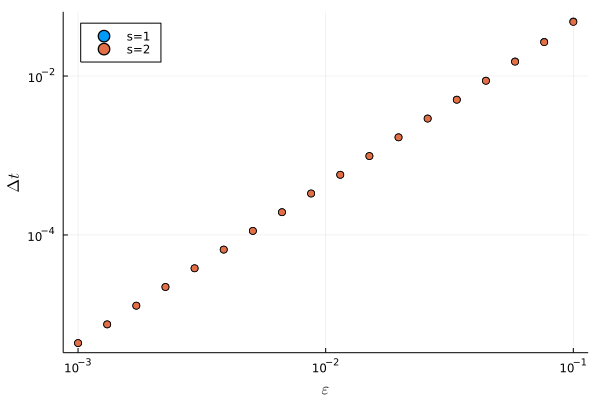

In [27]:
fig = Plots.plot(yscale=:log10, xscale=:log10, xlabel=L"\epsilon", ylabel=L"\Delta t",
                 dpi=300, legend=:topleft)

for s in 1:2
    dt = abs.(Xgeo[3] .- Xgshe[s, :, 3])

    label = "s=$s"
    Plots.scatter!(ϵs, dt, label=label)
end

#Plots.savefig(fig, "~/Downloads/dts.png")

display(fig)

50

In [399]:
n = 1
s = 1

k = 12
ϵ = ϵs[k]
p0 = Xgshe[n, s, k, :][1:2]

2-element Vector{Float64}:
 2.3884214163856976
 4.164972231795585

In [400]:
N = 250
xs = ys = LinRange(-0.5, 0.5, N)


f = GSHEIntegrator.setup_gshe_loss(geometry, ϵ, 2)


loss2(p) = f(p, p0, GSHEIntegrator.θmax_scaling(0.04, ϵ))

Z = GSHEIntegrator.grid_evaluate_scalar(loss2, xs, ys);

In [407]:
GSHEIntegrator.find_restricted_minimum(geometry, ϵs[k+1], 2, p0)

opt.minimum = Inf
opt.minimum = 0.0007359931874193483
opt.minimum = 0.0006511764690191282
opt.minimum = 0.0005467686421980724
opt.minimum = Inf
opt.minimum = Inf
opt.minimum = Inf
opt.minimum = Inf
opt.minimum = 2.894565048812314e-14


4-element Vector{Float64}:
   2.1562458426576
   4.269620232404494
 116.26158637903342
   1.2772396963930681

In [401]:
dir = GSHEIntegrator.rotate_to_y(Xgshe[n, s, k+1, 1:2], p0)
dir = GSHEIntegrator.atan_invtransform.(dir)

2-element Vector{Float64}:
 NaN
 NaN

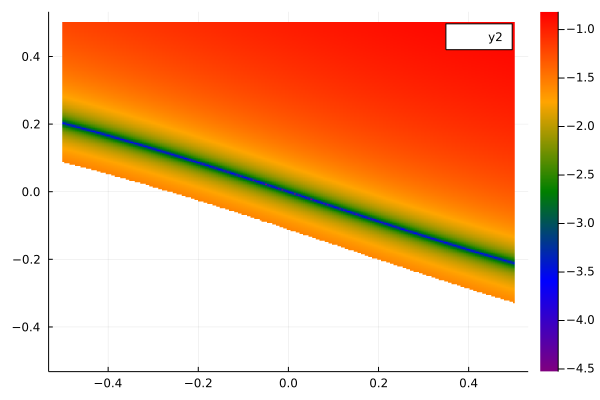

In [408]:
Plots.heatmap(xs, ys, log10.(Z), c=:rainbow)
Plots.scatter!([dir[1]], [dir[2]], c=:red)

In [339]:
αs, βs = GSHEIntegrator.fit_timing(ϵs, Xgeo, Xgshe, geometry)


βs

┌ Info: 1 element(s) x=[0.033838551534282335] y=[NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95


2×2×2 Array{Float64, 3}:
[:, :, 1] =
 4.99123  4.93532
 4.7004   4.64262

[:, :, 2] =
 0.129801  0.112684
 0.121434  0.110854

In [319]:
# fig = Plots.plot(xscale=:log10, yscale=:log10)

# for n in [1, 2]
#     for s in [1,2]
#         dt = abs.(Xgeo[n, 3] .- Xgshe[n, s, :, 3])
#         Plots.scatter!(fig, ϵs, dt)
#     end
# end

# display(fig)

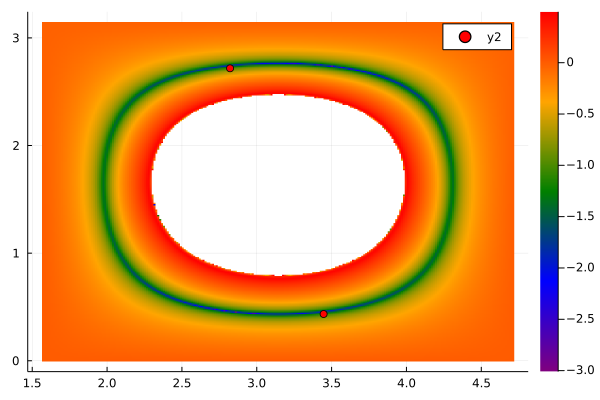

In [328]:
fig = Plots.heatmap(ϕs, θs, log10.(transpose(Z)), c=:rainbow, dpi=300)

Plots.scatter!(Xgeo[:, 2], Xgeo[:, 1], c=:red)

Plots.savefig(fig, "~/Downloads/ring.png")
display(fig)


In [3]:
Xgeos = GSHEIntegrator.solve_geodesics(geometries, Nsols);

Solving 121 configurations' geodesics.
Solving geodesics for geometry 62/121
Solving geodesics for geometry 42/121
Solving geodesics for geometry 46/121
Solving geodesics for geometry 16/121
Solving geodesics for geometry 88/121
Solving geodesics for geometry 69/121
Solving geodesics for geometry 11/121
Solving geodesics for geometry 92/121
Solving geodesics for geometry 86/121
Solving geodesics for geometry 106/121
Solving geodesics for geometry 25/121
Solving geodesics for geometry 108/121
Solving geodesics for geometry 29/121
Solving geodesics for geometry 90/121
Solving geodesics for geometry 33/121
Solving geodesics for geometry 56/121
Solving geodesics for geometry 66/121
Solving geodesics for geometry 71/121
Solving geodesics for geometry 72/121
Solving geodesics for geometry 48/121
Solving geodesics for geometry 77/121
Solving geodesics for geometry 55/121
Solving geodesics for geometry 115/121
Solving geodesics for geometry 39/121
Solving geodesics for geometry 14/121
Solving 

In [4]:
Xgshes = GSHEIntegrator.solve_gshes(Xgeos, geometries, ϵs, true, false);

Xgeos = GSHEIntegrator.Xgeos_to_array(Xgeos)
Xgshes = GSHEIntegrator.Xgshes_to_array(Xgshes)

npzwrite(joinpath(cdir, "$(runID)_Xgeos.npy"), Xgeos)
npzwrite(joinpath(cdir, "$(runID)_Xgshes.npy"), Xgshes)

Solving GSHE for 121 configurations.
Solving GSHE for geometry 108/121
Solving GSHE for geometry 36/121

Solving GSHE for geometry 63/121
Solving GSHE for geometry 116/121
Solving GSHE for geometry 72/121Solving GSHE for geometry 92/121
Solving GSHE for geometry 23/121
Solving GSHE for geometry 8/121
Solving GSHE for geometry 43/121
Solving GSHE for geometry 114/121
Solving GSHE for geometry 109/121
Solving GSHE for geometry 16/121
Solving GSHE for geometry 12/121
Solving GSHE for geometry 22/121
Solving GSHE for geometry 44/121
Solving GSHE for geometry 76/121
Solving GSHE for geometry 81/121
Solving GSHE for geometry 52/121
Solving GSHE for geometry 54/121
Solving GSHE for geometry 78/121
Solving GSHE for geometry 58/121
Solving GSHE for geometry 27/121
Solving GSHE for geometry 66/121
Solving GSHE for geometry 119/121
Solving GSHE for geometry 70/121
Solving GSHE for geometry 73/121
Solving GSHE for geometry 74/121
Solving GSHE for geometry 3/121
Solving GSHE for geometry 71/121
Sol

In [5]:
αs, βs = GSHEIntegrator.fit_timing(ϵs, Xgeos, Xgshes, geometries; fit_gshe_gshe=true)

npzwrite(joinpath(cdir, "$(runID)_alphas.npy"), αs)
npzwrite(joinpath(cdir, "$(runID)_betas.npy"), βs)

┌ Info: 2 element(s) x=[0.001, 0.0011721022975334804] y=[NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 3 element(s) x=[0.001, 0.0011721022975334804, 0.0013738237958832624] y=[NaN, NaN, 4.405364961712621e-13] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 2 element(s) x=[0.001, 0.0011721022975334804] y=[NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 2 element(s) x=[0.001, 0.0011721022975334804] y=[NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/powerlaw.jl:95
┌ Info: 2 element(s) x=[0.001, 0.0011721022975334804] y=[NaN, NaN] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projec

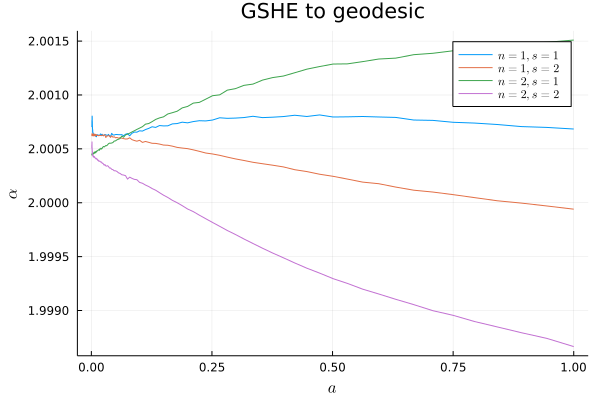

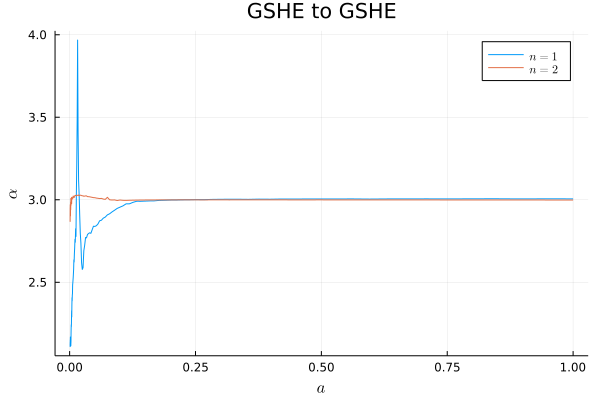

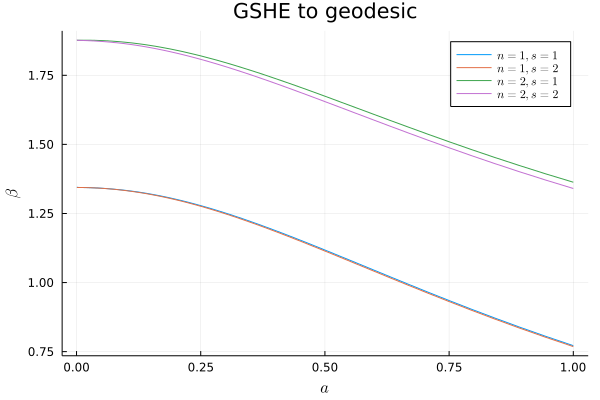

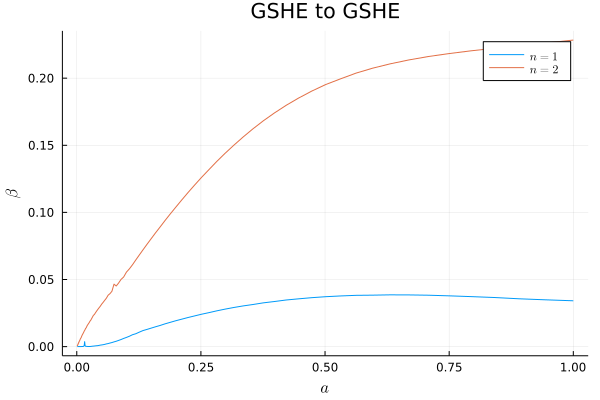

In [6]:
fig = Plots.plot(xlabel=L"a", ylabel=L"\alpha", legend=:best, dpi=300, title="GSHE to geodesic")
for i in 1:Nsols, s in 1:2
    sx = s == 1 ? 2 : -2
    Plots.plot!(fig, as, αs[:, i, s, 1], label=L"n = %$i, s = %$s")
end

display(fig)


fig = Plots.plot(xlabel=L"a", ylabel=L"\alpha", legend=:best, dpi=300, title="GSHE to GSHE")
for i in 1:Nsols
    Plots.plot!(fig, as, αs[:, i, 3, 1], label=L"n = %$i")
end

display(fig)



fig = Plots.plot(xlabel=L"a", ylabel=L"\beta", legend=:best, dpi=300, title="GSHE to geodesic")
for i in 1:Nsols, s in 1:2
    sx = s == 1 ? 2 : -2
    Plots.plot!(fig, as, βs[:, i, s, 1], label=L"n = %$i, s = %$s")
end

display(fig)


fig = Plots.plot(xlabel=L"a", ylabel=L"\beta", legend=:best, dpi=300, title="GSHE to GSHE")
for i in 1:Nsols
    Plots.plot!(fig, as, βs[:, i, 3, 1], label=L"n = %$i")
end

display(fig)